In [4]:
import pandas as pd
import requests
import configparser
import json
import matplotlib.pyplot as plt

In [5]:
from datetime import datetime, timezone, timedelta
gmt_plus_5_30 = timezone(timedelta(hours=5, minutes=30))

current_time = datetime.now(gmt_plus_5_30).strftime("%Y-%m-%d | %H:%M:%S")
current_time

'2024-12-09 | 13:04:41'

## Load the API keys

In [6]:
## Read the API
parser = configparser.ConfigParser()
parser.read(r"..\config\config.cfg")
api_key = parser["KEYS"]["api_key"]

## Functions

In [7]:
## Get the temperature data from location

lat = 19.076
lon = 72.8777

URL = f"https://api.openweathermap.org/data/2.5/weather"
CITIES = pd.read_csv(
    r"..\config\data\top_20_cities_india.csv"
)
COLUMNS = ['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'sea_level', 'grnd_level']

def get_weather_data(lat, lon):
    params = {"lat": lat, "lon": lon, "appid": api_key, "units": "metric"}
    response = requests.get(URL, params=params)

    data = None
    if response.status_code == 200:
        json_object = json.loads(response.text)
        data = json_object["main"]
        data = list(data.values())

    else:
        print("Connection Error")

    return data

def get_weather_dataframe():

    weather_df = CITIES.copy()
    weather_df['weather_data'] = weather_df.apply(lambda x: get_weather_data(x['Latitude'], x['Longitude']), axis=1)
    weather_df[COLUMNS] = weather_df['weather_data'].to_list()
    weather_df.drop('weather_data', axis=1, inplace=True)

    # weather_df.to_csv(export_path)
    # print(f"The data was successfully exported as {export_path}")
    return weather_df

## Get the latest weather data

In [8]:
## Write it to the database or save it as a flat file
export_path = r"C:\Users\kbora\Desktop\Development\Data Engineering\01-Airflow-Example\data\weather.csv"
df_weather = get_weather_dataframe()
df_weather.sort_values(by='feels_like')

,City,Latitude,Longitude,temp,feels_like,temp_min,temp_max,pressure,humidity,sea_level,grnd_level
1,Delhi,28.7041,77.1025,18.06,17.17,18.06,18.06,1014.0,48.0,1014.0,989.0
9,Jaipur,26.9124,75.7873,18.68,17.57,18.68,18.68,1014.0,37.0,1014.0,967.0
15,Bhopal,23.2599,77.4126,20.71,19.62,20.71,20.71,1014.0,30.0,1014.0,957.0
13,Indore,22.7196,75.8577,21.09,19.99,21.09,21.09,1014.0,28.0,1014.0,950.0
11,Kanpur,26.4499,80.3319,23.99,23.07,23.99,23.99,1013.0,24.0,1013.0,999.0
10,Lucknow,26.8467,80.9462,24.02,23.08,24.02,24.02,1013.0,23.0,1013.0,999.0
4,Ahmedabad,23.0225,72.5714,25.02,23.92,25.02,25.02,1014.0,13.0,1014.0,1009.0
18,Patna,25.5941,85.1376,23.98,24.24,23.98,23.98,1011.0,69.0,1011.0,1005.0
7,Surat,21.1702,72.8311,26.94,25.88,26.94,26.94,1013.0,13.0,1013.0,1011.0
6,Kolkata,22.5726,88.3639,25.96,25.96,25.96,25.96,1011.0,47.0,1011.0,1010.0


In [9]:
from random import randint

In [10]:
help(randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [11]:
city, temp = df_weather.loc[0, ['City', 'temp']]
city, temp

('Mumbai', 27.03)

## Plot the weather data

In [12]:
def plot_city_temperatures(df):
    """
    Plots the temperature of cities from the given DataFrame.

    df (DataFrame): DataFrame containing city names and their corresponding temperatures.
    """
    fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and axis

    # Create a bar graph
    bars = ax.bar(df['City'], df['temp'], color='skyblue')

    # Add titles and labels
    ax.set_title('Temperature of Cities in India', fontsize=16)
    ax.set_xlabel('City', fontsize=14)
    ax.set_ylabel('Temperature (°C)', fontsize=14)

    # Rotate x-titles for better visibility
    ax.set_xticks(range(len(df['City'])))  # Set x-ticks to match the number of cities
    ax.set_xticklabels(df['City'], rotation=45, ha='right')

    # Add grid for better readability
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

    # Add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()  # Get the height of the bar
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', 
                ha='center', va='bottom', fontsize=10)  # Add text above the bar

    # Adjust layout to prevent clipping of tick-labels
    plt.tight_layout()

    # Show the plot
    plt.show()

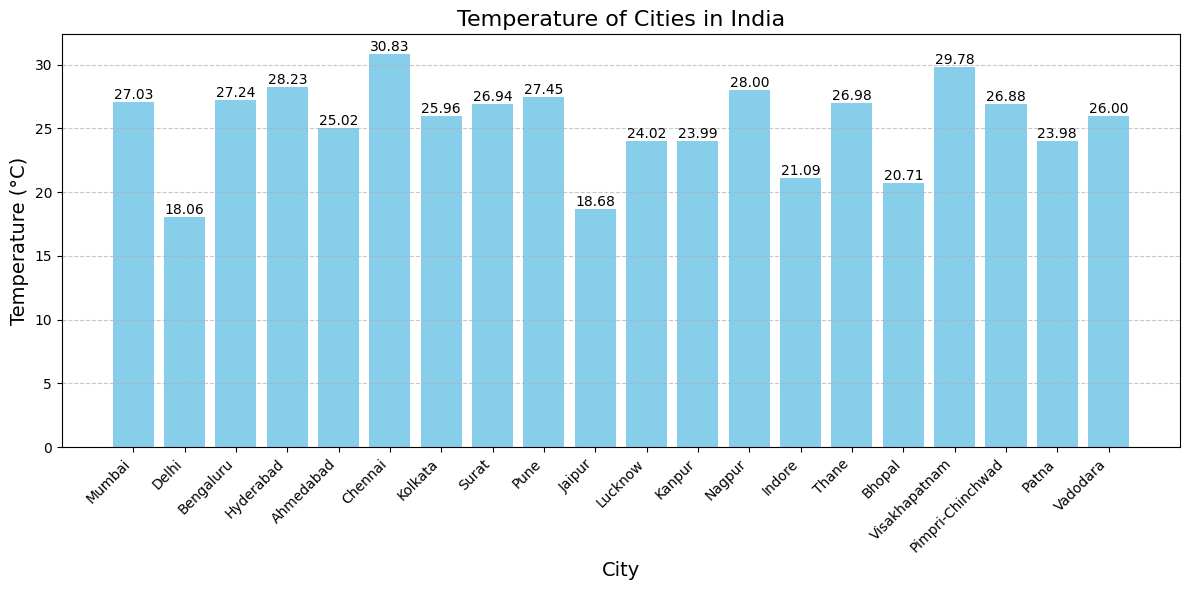

In [13]:
plot_city_temperatures(df_weather)

## Check the total size of the `conda env`

In [14]:
import os

def get_env_size(env_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(env_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            total_size += os.path.getsize(fp)
    return total_size

# Replace with the actual path to your conda environment
env_path = r'C:\Users\kbora\Anaconda3\envs\airflow-pipeline'
size_in_bytes = get_env_size(env_path)
size_in_mb = size_in_bytes / (1024 * 1024)  # Convert to MB

print(f"Size of the conda environment 'airflow-pipeline': {size_in_mb:.2f} MB")

Size of the conda environment 'airflow-pipeline': 670.14 MB


In [15]:
import pendulum
export_time = pendulum.now('Asia/Kolkata')
# Convert to string in a specific format
export_time_str = export_time.format('YYYY-MM-DD HH:mm:ss')

export_time_str

'2024-12-09 13:04:56'

In [16]:
df_weather.metadata = {"export_time": export_time_str}

C:\Users\kbora\AppData\Local\Temp\ipykernel_25528\3367160640.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_weather.metadata = {"export_time": export_time_str}


'2024-12-09 13:04:56'